In [66]:
inf = rut.readRHESSysBasin('/RHESSys/ComoCreek_new/out/growing_season/test_inflection_strt_112_nd_294_basin.daily')
inf = inf.loc[inf.wateryear==2010].copy()

In [67]:
std = rut.readRHESSysBasin('/RHESSys/ComoCreek_new/out/growing_season/test_static_strt_91_nd_260_basin.daily')
std = std.loc[std.wateryear==2010].copy()

In [68]:
ave = rut.readRHESSysBasin('/RHESSys/ComoCreek_new/out/growing_season/test_running_ave_strt_138_nd_298_basin.daily')
ave = ave.loc[ave.wateryear==2010].copy()

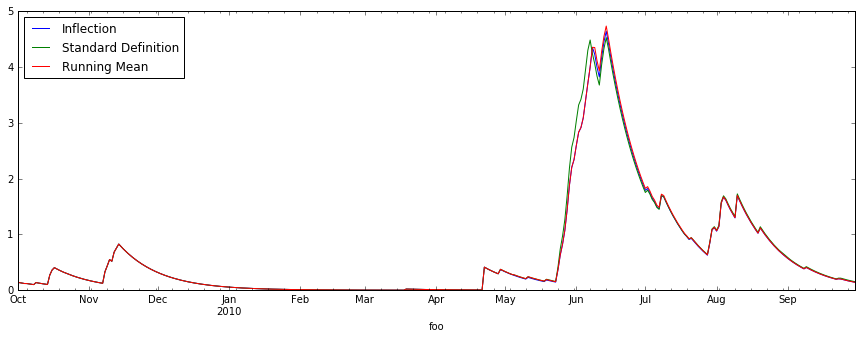

In [69]:
c = 'streamflow'
inf[c].plot(figsize=(15,5), label='Inflection')
std[c].plot(label='Standard Definition')
ave[c].plot(label='Running Mean')
plt.legend(loc='upper left')

In [70]:
inf.columns

Index([u'basinID', u'pot_surface_infil', u'snow_thr', u'sat_def_z', u'sat_def',
       u'rz_storage', u'unsat_stor', u'rz_drainage', u'unsat_drain', u'cap',
       u'evap', u'snowpack', u'trans', u'baseflow', u'return', u'streamflow',
       u'psn', u'lai', u'gw.Qout', u'gw.storage', u'detention_store',
       u'%sat_area', u'litter_store', u'canopy_store', u'%snow_cover',
       u'snow_subl', u'trans_var', u'acc_trans', u'acctransv_var', u'pet',
       u'dC13', u'precip', u'pcp_assim', u'mortf', u'tmax', u'tmin', u'tavg',
       u'vpd', u'snowfall', u'recharge', u'gpsn', u'resp', u'gs', u'rootdepth',
       u'plantc', u'snowmelt', u'canopysubl', u'routedstreamflow',
       u'canopy_snow', u'height', u'evap_can', u'evap_lit', u'evap_soil',
       u'litrc', u'Kdown', u'Ldown', u'Kup', u'Lup', u'Kstar_can',
       u'Kstar_soil', u'Kstar_snow', u'Lstar_can', u'Lstar_soil',
       u'Lstar_snow', u'LE_canopy', u'LE_soil', u'LE_snow', u'Lstar_strat',
       u'canopydrip', u'ga', u'wateryear'

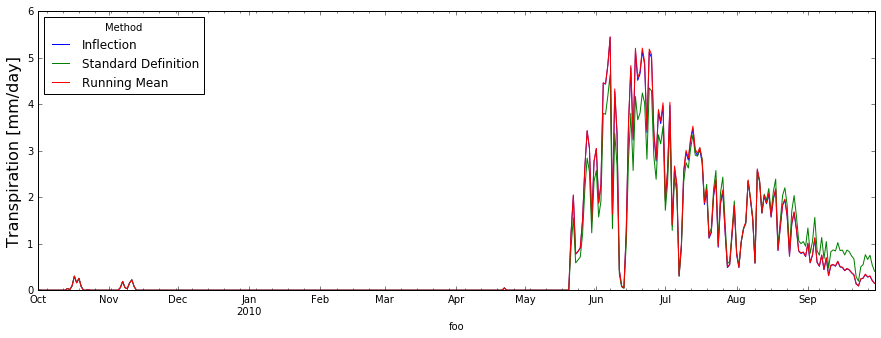

In [77]:
c = 'trans'
inf[c].plot(figsize=(15,5), label='Inflection')
std[c].plot(label='Standard Definition')
ave[c].plot(label='Running Mean')
#ave.snowmelt.plot()
#ave.precip.plot()
plt.legend(loc='upper left', title='Method')
plt.ylabel('Transpiration [mm/day]', fontsize=16)
#plt.ylim(0,10)

In [12]:
for df,name in zip([inf,ave,std],['Inflection','Running Mean','Standard Definition']):
    print '%s Cumulative ET: %s'%(name,df.ET.sum())

Inflection Cumulative ET: 488.838331
Running Mean Cumulative ET: 486.946953
Standard Definition Cumulative ET: 483.657111


In [14]:
for df,name in zip([inf,ave,std],['Inflection','Running Mean','Standard Definition']):
    print '%s Cumulative Streamflow: %s'%(name,df.streamflow.sum())

Inflection Cumulative Streamflow: 236.153855
Running Mean Cumulative Streamflow: 237.751417
Standard Definition Cumulative Streamflow: 232.460476


In [37]:
ave['Method'] = 'Running Mean'

In [38]:
inf['Method'] = 'Inflection'

In [39]:
std['Method'] = 'Standard'

In [40]:
ave2 = pd.melt(ave,id_vars='Method')
inf2 = pd.melt(inf,id_vars='Method')
std2 = pd.melt(std,id_vars='Method')

In [41]:
df = pd.concat([ave2,inf2,std2],axis=0)

In [42]:
df.loc[df.variable=='trans'].groupby(by='Method').sum()

,value
Method,
Inflection,249.756380
Running Mean,252.690575
Standard,241.783814
